In [39]:
#Imports
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [41]:
#Import data
read_in_arr = pd.read_csv('/content/drive/MyDrive/AAPL.csv')
read_in_arr = read_in_arr.drop('Date', axis = 1)
read_in_arr = read_in_arr.drop('Adj Close', axis = 1)

In [43]:
#Creating test/train sets and the regressor
close = read_in_arr['Close']
data = read_in_arr.loc[:,read_in_arr.columns != 'Close']

#80/20 seemed to create the best results
train_d, test_d, train_c, test_c = train_test_split(data, close, test_size=0.2)

print('Training Data:\n' , train_d.head)

print('Training Close Values:\n', train_c.head)

reg = LinearRegression()
reg.fit(data, close)

Training Data:
 <bound method NDFrame.head of             Open        High         Low     Volume
853    61.855000   62.312500   61.680000   96572800
291    39.262501   39.302502   38.755001  108389200
884    67.202499   67.775002   67.125000   78756800
1187  124.680000  126.459999  120.540001  148199500
829    55.257500   55.622501   54.297501  124763200
...          ...         ...         ...        ...
816    53.000000   53.492500   52.877499   95654800
75     28.605000   28.697500   27.887501  209924800
1158  128.759995  131.449997  128.490005   88636800
237    38.400002   38.642502   37.427502  203070800
57     26.655001   26.860001   26.572500   99881200

[1006 rows x 4 columns]>
Training Close Values:
 <bound method NDFrame.head of 853      62.262501
291      38.892502
884      67.692497
1187    120.989998
829      54.419998
           ...    
816      53.320000
75       28.177500
1158    130.889999
237      37.562500
57       26.705000
Name: Close, Length: 1006, dtype: float64

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of Determination: 0.9997338159573855
Mean Squared Error: 0.31867939325174227
Regression Coefficients: [-5.47713545e-01  8.71514997e-01  6.74091504e-01 -1.18987720e-09] 



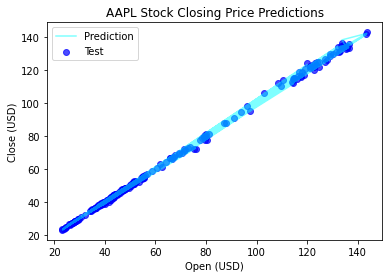

In [48]:
predicted_close = reg.predict(test_d)
score = r2_score(predicted_close, test_c)
err = mean_squared_error(test_c, predicted_close)

plt.scatter(test_d['Open'], test_c, color = 'blue', alpha = 0.7, label ='Test')
plt.plot(test_d['Open'], predicted_close, color = 'cyan', alpha = 0.5, label ='Prediction')
plt.title('AAPL Stock Closing Price Predictions')
plt.xlabel('Open (USD)')
plt.ylabel('Close (USD)')
plt.legend()

print('Coefficient of Determination:', score)
print('Mean Squared Error:', err)

coeff = reg.coef_
print('Regression Coefficients:', coeff, '\n')

Predicted close value: 129.92705438484876


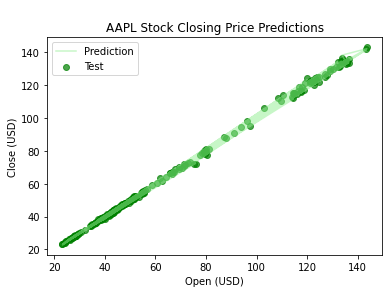

In [98]:
#Four predictors used, so there's four coefficients
#Regression function in the form of: c0 + c1x1 + ... + cnxn
#y-intercept is zero
def pred_function(x):
  first = coeff[0] * x[0]
  second = coeff[1] * x[1]
  third = coeff[2] * x[2]
  fourth = coeff[3] * x[3]
  return first + second + third + fourth

test = pd.array([130.85, 131.26, 129.5, 79450670])
print('Predicted close value:', pred_function(test))

pred_f_values = []
for i in range(0, len(test_d)):
  pred_f_values.append(pred_function(test_d.iloc[i]))

plt.scatter(test_d['Open'], test_c, color = 'green', alpha = .7, label ='Test')
plt.plot(test_d['Open'], pred_f_values, color = 'lightgreen', alpha = 0.5, label ='Prediction')
plt.title('\nAAPL Stock Closing Price Predictions')
plt.xlabel('Open (USD)')
plt.ylabel('Close (USD)')
plt.legend()